In [71]:
# Tratamiento de datos
import pandas as pd
import numpy as np

In [72]:
df_bank = pd.read_csv("../data/processed/bank-additional_clean.csv")

In [73]:
# Comporbamos que la tabla sea la de después de la limpieza
df_bank.sample(4)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,nr.employed,y,date,latitude,longitude,id_,day,year,month,campaign_edit
37390,36.0,unemployed,SINGLE,university.degree,0.0,0.0,0.0,cellular,260,1,...,5076.2,no,2017-06-03,27.291,-104.799,75a51445-8860-43fa-824e-55c89b9860d3,3.0,2017.0,6.0,1
18057,25.0,services,SINGLE,basic.9y,0.0,1.0,0.0,cellular,509,1,...,5228.1,yes,2016-05-05,27.044,-100.629,a5e9823d-c84a-4230-af76-4885b4545693,5.0,2016.0,5.0,1
42584,30.0,technician,SINGLE,university.degree,0.0,0.0,1.0,cellular,39,1,...,5099.1,no,2016-12-13,33.041,-83.594,cc55d369-a9da-46d8-b99b-5d9938a77111,13.0,2016.0,12.0,1
9728,33.0,admin.,MARRIED,high.school,0.0,0.0,0.0,telephone,916,1,...,5228.1,no,2018-05-21,26.155,-83.950,e05c1b14-ea01-4b2f-88eb-97f91160121a,21.0,2018.0,5.0,1


In [74]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            43000 non-null  object 
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  43000 non-null  float64
 15  cons.conf.idx   43000 non-null  float64
 16  euribor3m       43000 non-null  float64
 17  nr.employed     43000 non-null 

## EDA

Lo primero que analizo es la variable objetivo (y), ya que es la que me interesa explicar o predecir. Quiero ver cuántos clientes dijeron “sí” al depósito y cuántos dijeron “no”. Esto me permite comprobar si la variable está balanceada o desbalanceada.

In [75]:
df_bank["y"].value_counts(normalize=True) * 100

y
no     88.734884
yes    11.265116
Name: proportion, dtype: float64

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

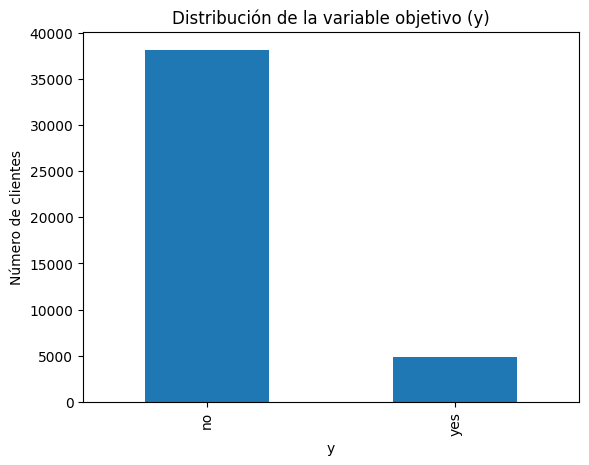

In [77]:
df_bank["y"].value_counts().plot(kind="bar")
plt.title("Distribución de la variable objetivo (y)")
plt.ylabel("Número de clientes")
plt.show()

En la gráfica se observa que la gran mayoría de los clientes respondió “no”, mientras que solo una minoría respondió “yes”.
Esto confirma que el dataset está desbalanceado: hay muchos más casos negativos que positivos.
En términos de negocio, significa que convencer al cliente es difícil y que los “sí” son relativamente pocos, por lo que será importante entender en qué condiciones se consiguen.

Ahora paso a analizar las variables numéricas: age, duration, campaign

In [78]:
df_bank[["age", "duration", "campaign"]].describe()

,age,duration,campaign
count,43000.000000,43000.000000,43000.000000
mean,39.741698,257.739279,2.567233
std,9.817735,258.666033,2.772294
min,17.000000,0.000000,1.000000
25%,33.000000,102.000000,1.000000
50%,38.000000,179.000000,2.000000
75%,46.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


Analizamos primero la edad, viendo si hay valores raros. Me interesa ver si hay concentración en ciertos grupos de edad y comprobar si existen valores raros (por ejemplo, edades muy altas o bajas)

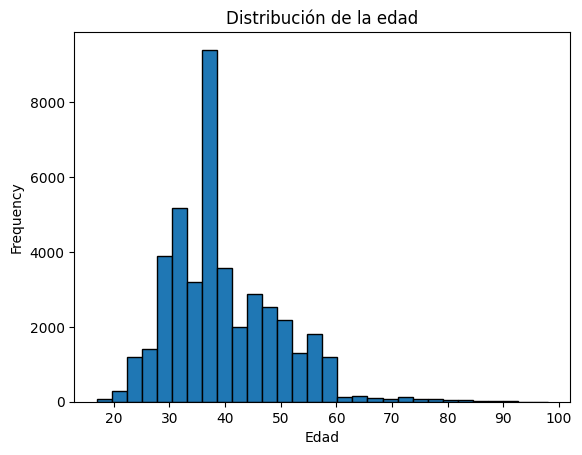

In [79]:
df_bank["age"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.show()

DURACIÓN DE LLAMADA. Como vimos durante el análisis preliminar, muchas llamadas son cortas y pocas son muy largas, lo cual puede distorsionar la gráfica. Por eso limito el gráfico al percentil 95 para tener una visión más clara.

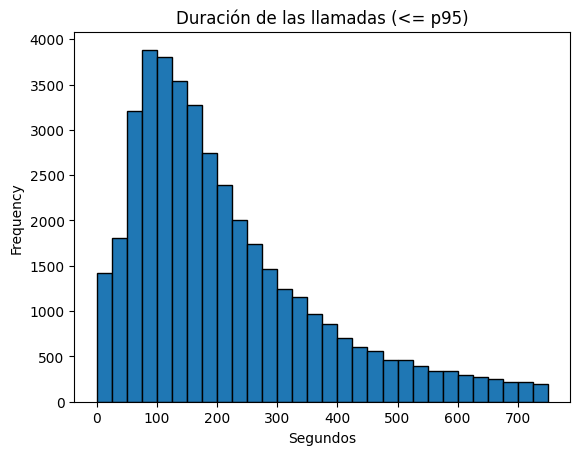

In [80]:
p95 = df_bank["duration"].quantile(0.95)
df_bank.loc[df_bank["duration"] <= p95, "duration"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Duración de las llamadas (<= p95)")
plt.xlabel("Segundos")
plt.show()

NÚMERO DE CONTACTO. Me ayuda a ver si la mayoría de clientes recibe pocas llamadas o si hay casos con muchas llamadas

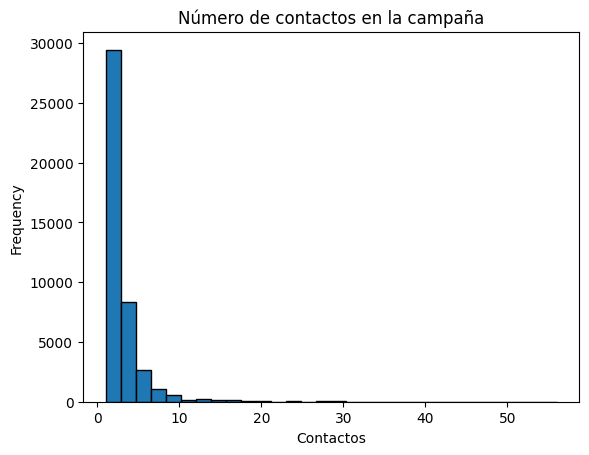

In [81]:
df_bank["campaign"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Número de contactos en la campaña")
plt.xlabel("Contactos")
plt.show()

A continuación las variables categóricas, como hicimos con algunas columnas durante el análisis preliminar. El objetivo es ver qué categorías predominan y cómo está compuesta la base de clientes en términos de profesión, estado civil, educación y método de contacto.

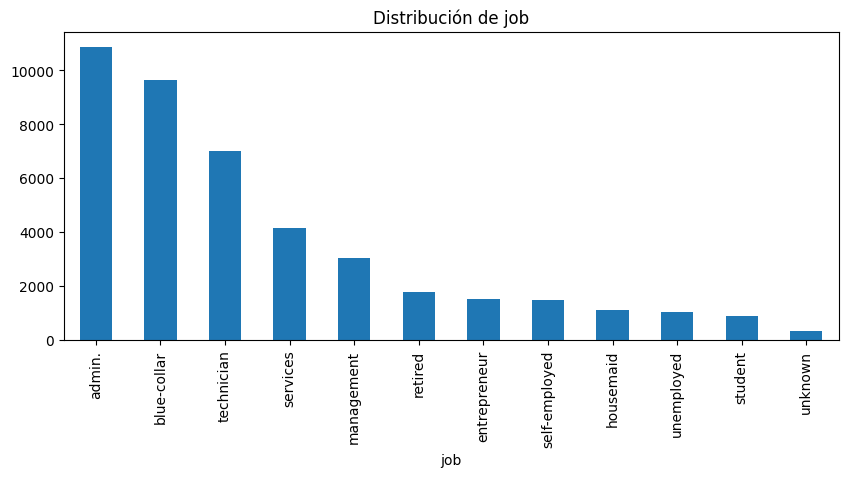

In [82]:
# Vamos a estudiar los distintos tipos de trabajos, ya que dependiendo del tipo podemos ver si la contratación
# también depende del nivel socioeconómico
df_bank["job"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Distribución de job")
plt.show()

La categoría más frecuente es admin., seguida de blue-collar y technician. También hay un grupo relevante en services y management. Las demás profesiones tienen menos representación (ej. student, unemployed). Esto muestra que la mayoría de clientes trabaja en empleos administrativos, técnicos o manuales.

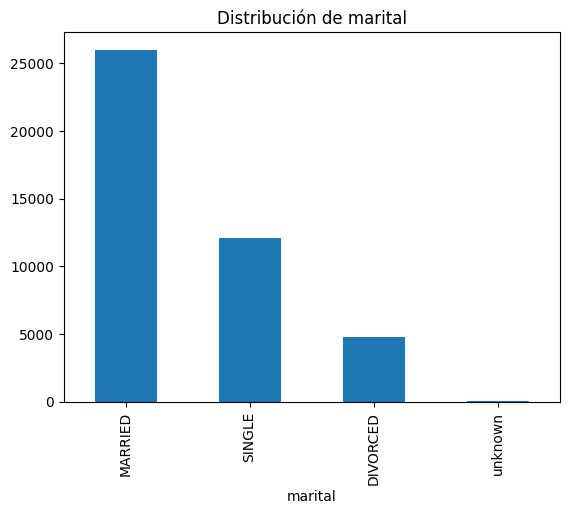

In [83]:
# Estudiamos la columna de distribución marital, ya que puede influir en la decisión de ahorro o inversión
df_bank["marital"].value_counts().plot(kind="bar")
plt.title("Distribución de marital")
plt.show()



Predominan los clientes casados (married), seguidos por los solteros (single) y, en menor medida, los divorciados (divorced). Esto sugiere que la base de clientes está formada principalmente por personas con familia constituida

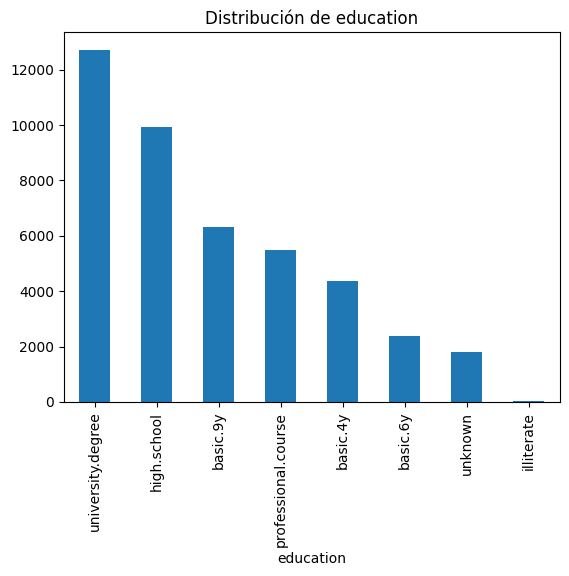

In [84]:
# El nivel educativo puede influir en la percepción de riesgo y en la disposición a contratar productos financieros
df_bank["education"].value_counts().plot(kind="bar")
plt.title("Distribución de education")
plt.show()

El grupo mayoritario es university degree, seguido de high school. Los niveles básicos (basic.9y, basic.4y, basic.6y) suman menos casos, y la categoría illiterate es casi inexistente. Esto indica que gran parte de los clientes tiene un nivel educativo medio o alto.

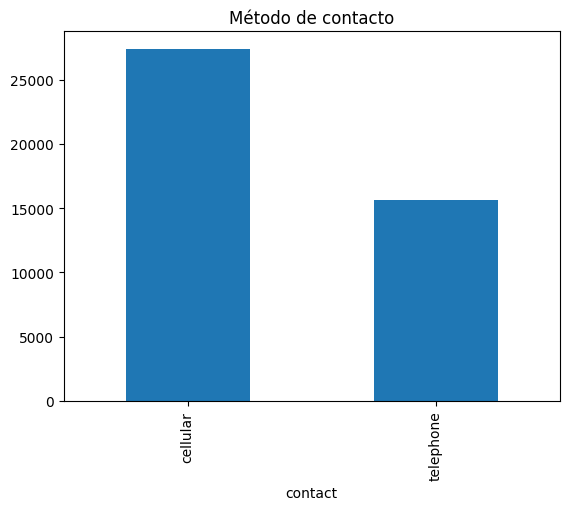

In [85]:
#Por último, reviso la variable contact, que indica el método de contacto utilizado.
# Es importante porque la eficacia de la campaña puede depender del canal.

df_bank["contact"].value_counts().plot(kind="bar")
plt.title("Método de contacto")
plt.show()

El contacto más habitual es el celular (cellular), con diferencia respecto al teléfono fijo. Esto muestra que la estrategia de la campaña se centra en llamadas a móviles, probablemente porque es más efectivo

A continuación vamos a comparar las variables categóricas con la variable objetivo. De esta forma podremos estudiar los factores que influyen a que un cliente diga "yes"

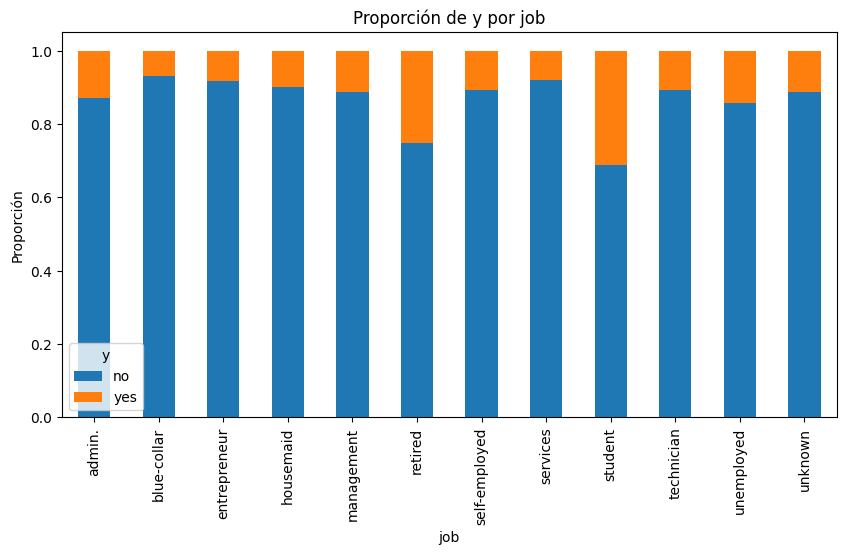

In [86]:
job_success = df_bank.groupby("job")["y"].value_counts(normalize=True).unstack().fillna(0)
job_success.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Proporción de y por job")
plt.ylabel("Proporción")
plt.show()


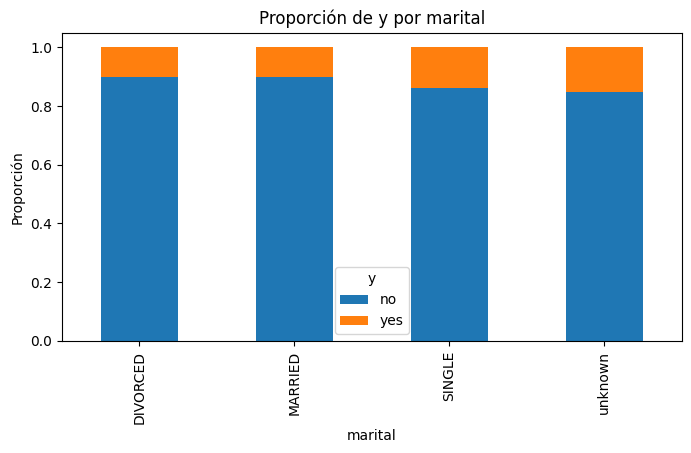

In [87]:
marital_success = df_bank.groupby("marital")["y"].value_counts(normalize=True).unstack().fillna(0)
marital_success.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Proporción de y por marital")
plt.ylabel("Proporción")
plt.show()


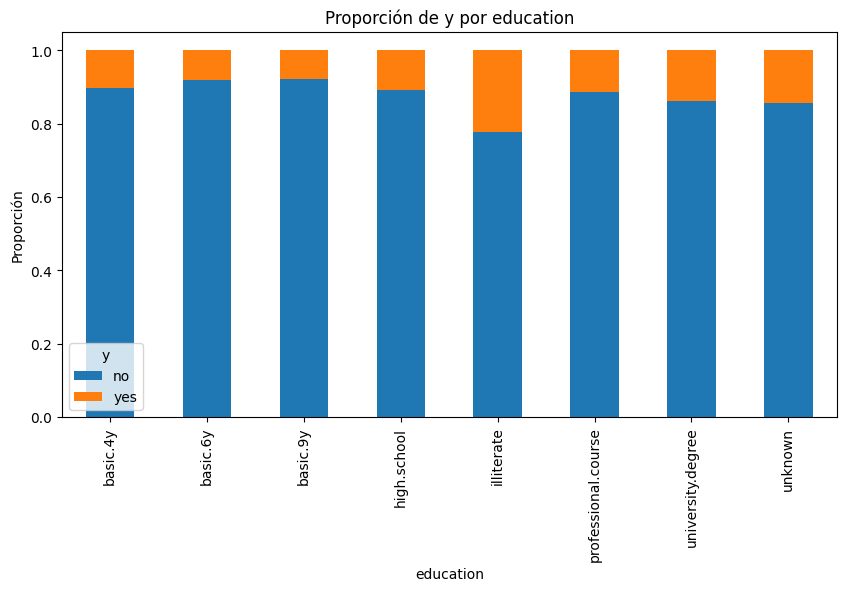

In [88]:
edu_success = df_bank.groupby("education")["y"].value_counts(normalize=True).unstack().fillna(0)
edu_success.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Proporción de y por education")
plt.ylabel("Proporción")
plt.show()


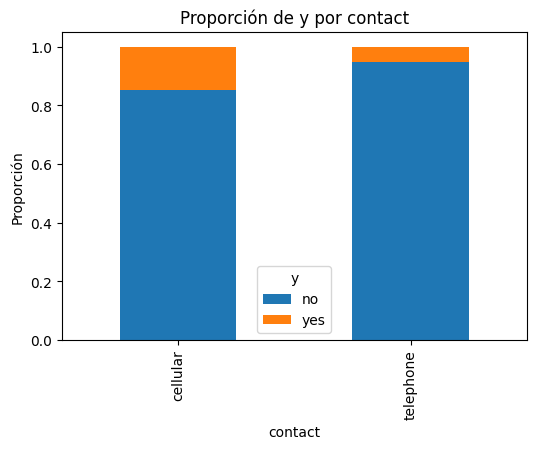

In [89]:
contact_success = df_bank.groupby("contact")["y"].value_counts(normalize=True).unstack().fillna(0)
contact_success.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Proporción de y por contact")
plt.ylabel("Proporción")
plt.show()


## Conclusiones de momento

- Variable objetivo (y):
La mayoría de los clientes contestó “no”. Solo una parte pequeña dijo que “sí”, por lo que los datos están bastante desequilibrados.

- Edad:
La mayor parte de clientes tiene entre 30 y 40 años. También hay bastantes de 40 a 60, pero menos. No aparecen edades raras, así que la variable está bien.

- Duración de las llamadas:
Casi todas las llamadas fueron cortas, aunque hay unas pocas que duraron bastante más. Las llamadas largas podrían ser más efectivas, pero no son las más habituales.

- Número de contactos (campaign):
Lo normal es que un cliente reciba solo 1 o 2 llamadas. Existen algunos casos con muchas llamadas (más de 10), pero son pocos.

- Profesión (job):
Los grupos más grandes son admin, blue-collar y technician. En cambio, hay pocos estudiantes, desempleados o casos desconocidos.
Mirando la relación con y, se ve que en management y student hay más proporción de “sí”, mientras que en blue-collar predominan los “no”.

- Estado civil (marital):
La mayoría son casados, seguidos de solteros y menos divorciados.
Al cruzarlo con y, se nota que single y divorced tienen algo más de éxito que married.

- Educación (education):
La mayoría tiene estudios universitarios o de secundaria. Muy pocos son analfabetos.
En la relación con y, los que tienen niveles educativos altos (universidad, cursos profesionales) responden “sí” con más frecuencia que los de nivel básico.

- Método de contacto (contact):
Casi todos los contactos fueron por móvil, y este canal consigue mejores resultados que el teléfono fijo.

- Más éxito en profesiones cualificadas y en clientes con educación alta.
- Los solteros y divorciados parecen más propensos que los casados.
- El móvil es mucho más efectivo que el teléfono fijo.

### BOXPLOT

Ahora calculo la correlación entre las variables numéricas. Esto sirve para detectar relaciones 
lineales fuertes entre ellas (por ejemplo, si dos variables están muy relacionadas y aportan 
información similar).


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

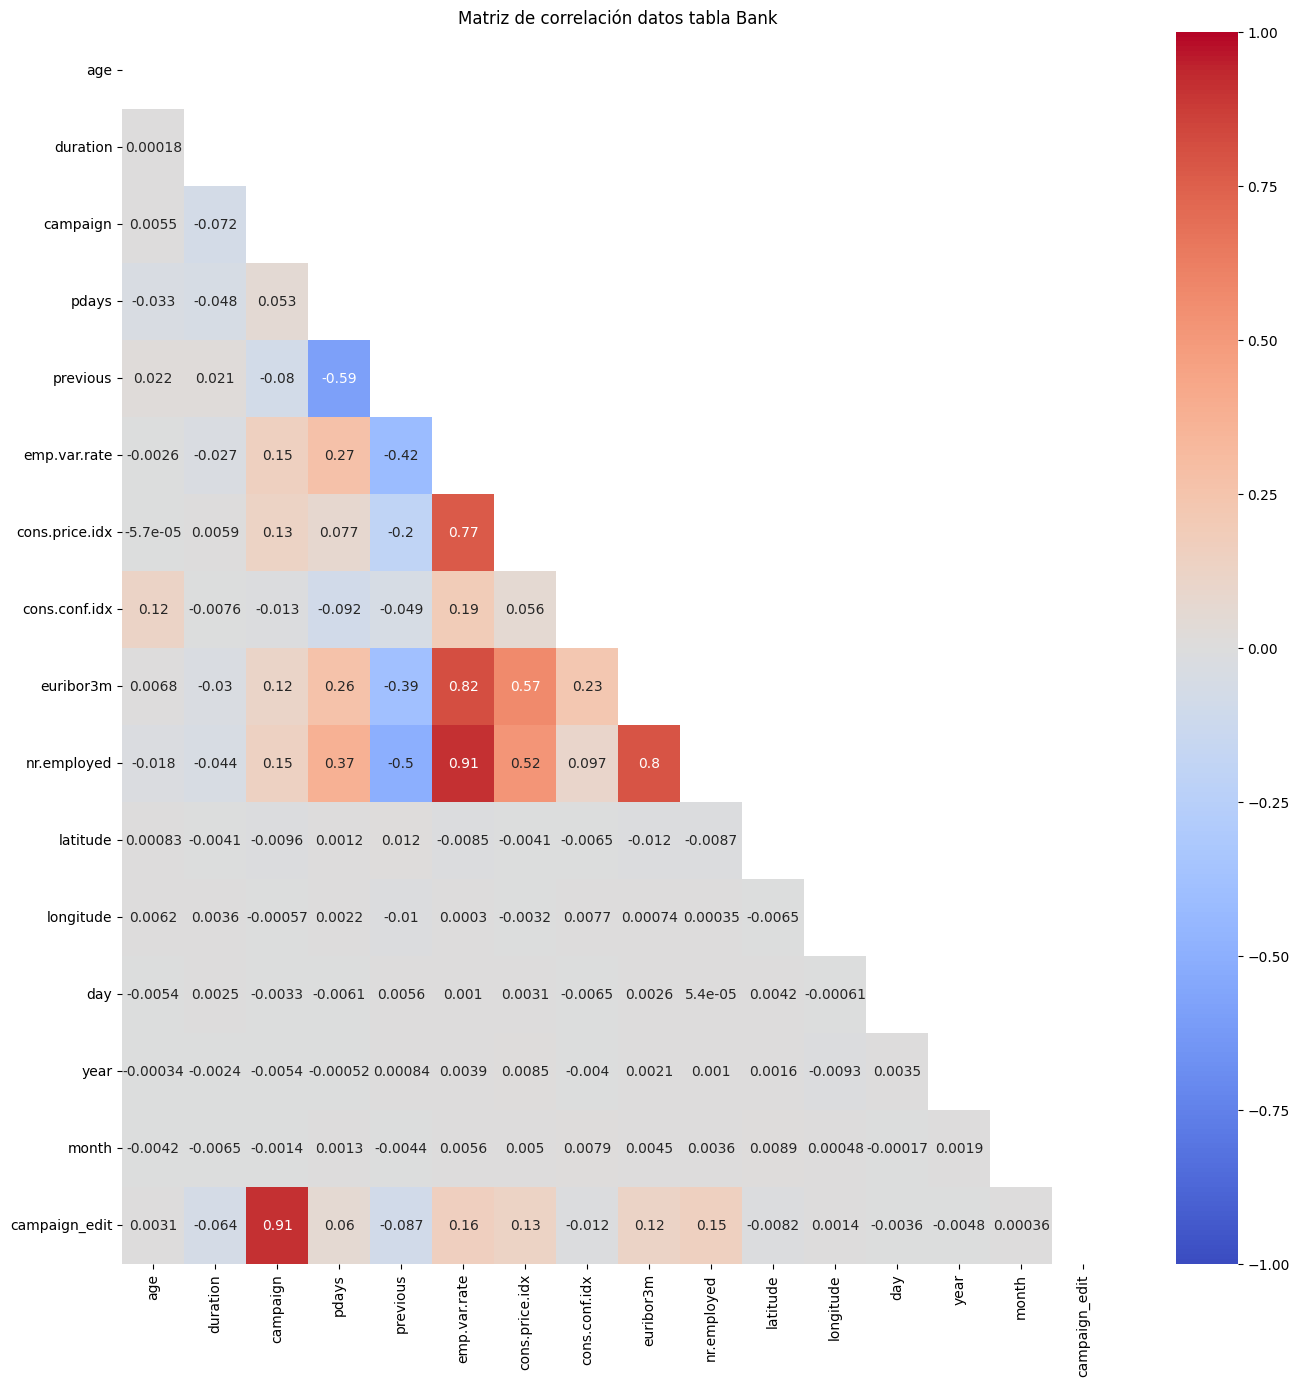

In [91]:
# Con las variables numéricas vamos a general la matriz de correlación
corr_matrix = df_bank.corr(numeric_only=True) # Creamos la matriz 
plt.figure(figsize=(corr_matrix.shape)) # Creamos la figura
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # crear una máscara para mostrar solo la parte triangular
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            mask=mask, 
            vmin=-1, 
            vmax=1)
plt.title("Matriz de correlación datos tabla Bank")
plt.show()

### Interpretación del mapa de correlación
- Las variables macroeconómicas están muy correlacionadas entre sí:
 `emp.var.rate`, `euribor3m` y `nr.employed` presentan correlaciones muy altas (superiores a 0.8). Esto indica que estas variables aportan información similar.

- La mayoría de variables de cliente (`age`, `campaign`, `duration`) muestran correlaciones muy bajas con el resto,
  lo que significa que son más independientes.

En conclusión, las variables económicas se mueven de forma conjunta, mientras que las variables de cliente aportan información más diversa e independiente.


BOXPLOT CRUZADOS

### Duración de llamadas según la respuesta del cliente
La variable `duration` indica cuántos segundos duró la última llamada.  
Queremos comprobar si las llamadas más largas se relacionan con mayor probabilidad de suscripción (`y`).

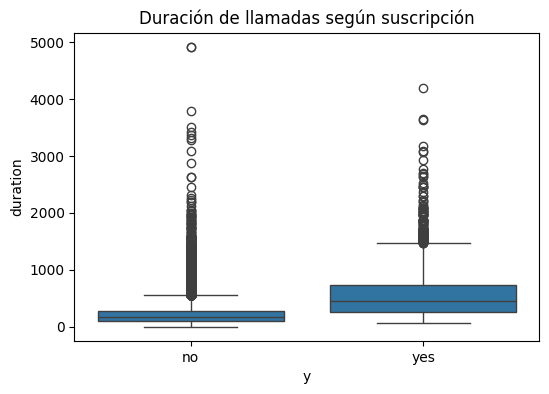

In [92]:
plt.figure(figsize=(6,4))
sns.boxplot(x="y", y="duration", data=df_bank)
plt.title("Duración de llamadas según suscripción")
plt.show()


Se observa que los clientes que dicen "yes" suelen tener llamadas más largas. Puede ser que al contratar el servicio la llamada dure más tiempo para cerrar detalles.

### Número de contactos y suscripción
Analizamos si el número de veces que se contacta a un cliente (`campaign`) afecta a la probabilidad de que se suscriba (`y`).

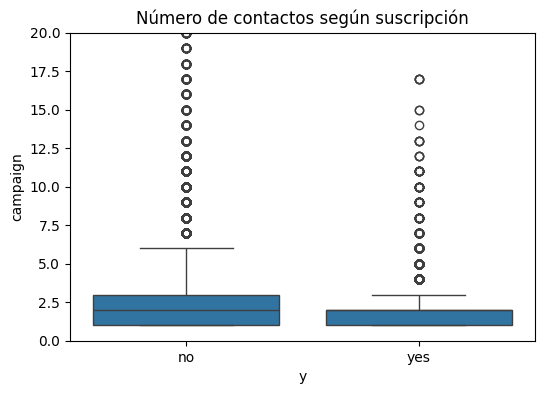

In [98]:
plt.figure(figsize=(6,4))
sns.boxplot(x="y", y="campaign", data=df_bank)
plt.title("Número de contactos según suscripción")
plt.ylim(0, 20)  # limitamos el eje Y para ver mejor (hay outliers muy altos)
plt.show()

Los clientes que finalmente se suscriben no requieren de tantas llamas. Además, en general cuantas mas llamadas haga una compañia hacia un cliente, se asocia de manera negativa.

### Edad según estado civil
Este gráfico nos ayuda a ver si hay diferencias de edad según el estado civil de los clientes.

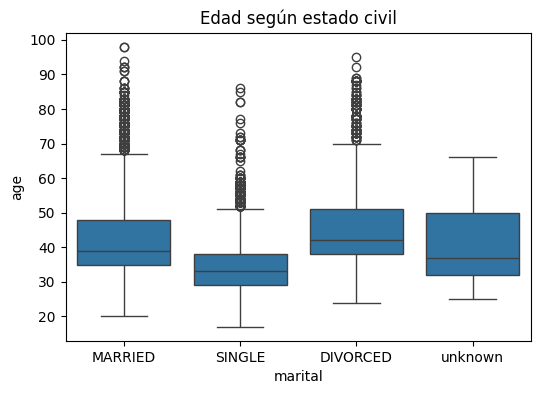

In [99]:
plt.figure(figsize=(6,4))
sns.boxplot(x="marital", y="age", data=df_bank)
plt.title("Edad según estado civil")
plt.show()


- Los clientes "single" son en promedio más jóvenes.  
- Los "married" presentan una edad mediana más alta.  
- Los "divorced" tienden a ser aún mayores.  
Esto refleja un patrón esperado: el estado civil está bastante relacionado con la edad de las personas.


## Conclusión final del EDA (Bank)

Tras realizar el análisis exploratorio de los datos, podemos destacar varias ideas principales:

1. **Desbalance en la variable objetivo (`y`)**  
   La mayoría de clientes no aceptan la oferta (clase "no"), mientras que solo una pequeña parte responde afirmativamente ("yes"). Esto indica que el dataset está desbalanceado, algo a tener en cuenta en futuros modelos predictivos.

2. **Variables sociodemográficas**  
   - La edad de los clientes se concentra entre los 30 y 50 años.  
   - La mayoría de clientes están casados y con estudios universitarios o de secundaria.  
   - Los más jóvenes suelen ser solteros, mientras que los divorciados son de mayor edad.

3. **Comportamiento en la campaña**  
   - La duración de las llamadas es muy relevante: cuanto más largas, mayor probabilidad de obtener un "sí".  
   - La mayoría de clientes fueron contactados muy pocas veces, lo cual es lógico para evitar saturación.  
   - Hay relación entre el número de contactos previos y el resultado de la campaña, aunque no es tan marcada como la duración.

4. **Método de contacto**  
   El canal más frecuente es el teléfono móvil, con mejores resultados en comparación con teléfono fijo.

5. **Entorno económico**  
   Algunas variables macroeconómicas (como `euribor3m` o `nr.employed`) presentan alta correlación entre sí.

6. **Relaciones cruzadas**  
   - Los clientes retirados y estudiantes presentan mayores tasas de aceptación que otros grupos laborales.  
   - El estado civil también influye: los solteros muestran más probabilidad de responder positivamente.

**En resumen:** el EDA muestra que el éxito de la campaña depende en gran medida de factores como la duración de la llamada, la edad, la ocupación y el canal de contacto. Además, el dataset está desbalanceado, lo cual será un aspecto clave a tener en cuenta en futuros modelos de machine learning.
